In [1]:
%matplotlib inline

import fockspy
from fockspy import fock_classes as fc


import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy import sparse
from scipy.sparse import coo_matrix
from scipy.sparse import coo_array
from scipy.sparse import identity
from scipy.sparse import diags

### Fock spaces initialization 

In [4]:
m2 = 10
N2 = 5
n2 = np.ones(m2)

f1 = fc.fock_space(1,1, statistics = 'Bose')
f2 = fc.fock_space(n2,N2, statistics = 'Bose')
f = fc.fock_space_kron(f1,f2)

### Problem parameters

In [8]:
w_s = 1
B = 0.5

w = np.linspace(-B, B, num = m2+1)
g = np.full(m2+1, 0.1)
g_conj = np.conj(g)


K = f.dimension
m = f2.modes
sigma = f.annihilate
sigma_dag = f.create


psi0 = np.zeros(K, dtype = complex)
j1 = 0
psi0[j1]=1


dt = 0.01
tmax = 100

Q = sigma_dag[0]@sigma[0] 

### Hamiltonian building

#### $ H_{s} = \frac{\omega_{s}}{2} \sigma_{z} $
#### $ H_{e} = \sum\limits_{n} \frac{\omega_{n}}{2} \sigma_{z}^{(n)} $
#### $ H_{se} = \sum\limits_{n} (g_{n}^{*} \sigma_{0}^{+}\sigma_{n} + g_{n} \sigma_{0}^{-}\sigma_{n}^{+} ) $
#### $ H = H_{s} + H_{e} + H_{se} $

In [9]:
#constant part of Hamiltonian
H0  = f.emptyH
Hs  = f.emptyH
He  = f.emptyH
Hse1  = f.emptyH
Hse2  = f.emptyH
Hse  = f.emptyH

Hs = w_s/2*f.sigmaz(0)

for n in range(1,m+1):
    He += w[n]/2 * f.sigmaz(n).__pow__(n)
    Hse1 += g_conj[n] * sigma[n]
    Hse2 += g[n] * sigma_dag[n]

Hse = sigma_dag[0] @ Hse1 + sigma[0] @ Hse2

H0 = Hs + He + Hse

#time related part of Hamiltonian
def func(t):
    return(0.1*np.cos(t))
def H(t):
    return (H0 + f.sigmax(0)*func(t))

### Evolve the system

In [10]:
%%time
occupation_of_qubit = fc.real_time_solver(psi0, dt, tmax, H, Q)

CPU times: total: 32.2 s
Wall time: 32.3 s


### Visualize the results

C:\Users\mrsgm\AppData\Local\Temp\ipykernel_16944\2902288889.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


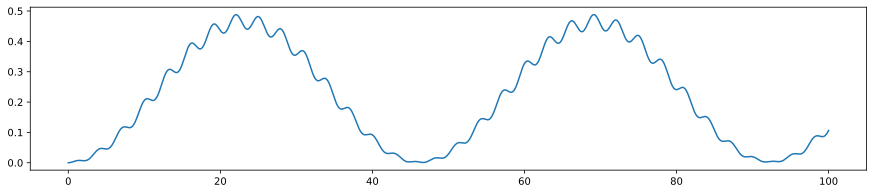

In [11]:
from numpy import loadtxt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


t=np.linspace(0,tmax,int(tmax/dt)+1)
plt.figure(figsize=(15,3))

plt.plot(t, occupation_of_qubit)

#plt.savefig('fock_clss_result3.svg')